#  <font color='dark gary'> pyOD(python Outlier detection) - Anomaly detection method
- https://pub.towardsai.net/why-outlier-detection-is-hard-94386578be6c
    
- An anomaly is something that arouses suspicion that it was generated by different data generating mechanism
    
## A Unified API
- All detectors are initialized with a contamination parameter. The contamination is the expected proportion of outliers in your data and is used to set an anomaly score threshold during model fitting. By default, contamination=0.1 and must be between 0 and 0.5.
Detectors have the following functions:
- fit(data): Fit detector. Use the training data to compute any necessary statistics. Unlike supervised models in scikit-learn, the fit method in PyOD does not require a y parameter for target labels.
- decision_function(data): Calculate raw outlier scores for new data using the fitted detector. (Note: some detectors still work well without prior fitting)
- predict(data): Return a binary label (outlier/normal) corresponding to each input sample. Under the hood, this function applies a threshold generated during the fit step to anomaly scores returned by the decision_function.
- predict_proba(data): Return the anomaly scores scaled as probabilities using either normalization or unification.
    
    
Once fitted, a detector contains the attributes decision_scores_, labels_, and threshold_.

- decision_scores_ — The outlier scores for the training data. Higher scores indicate the data is more anomalous
- threshold_ — The threshold is determined based on the initialized contamination during fitting. It set according to the n_samples * contamination highest scores in decision_scores_.
- labels_ — The binary anomaly labels for the training data. 0 indicates an observation is an inlier and 1 indicates an outlier. It is generated by applying the threshold_ to decision_scores_.

In [36]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

In [37]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

# <font color='brown'> Demo
- https://towardsdatascience.com/pyod-a-unified-python-library-for-anomaly-detection-3608ec1fe321
    
## Data generation

(array([[  2.,   1.,   1.,   4.,   3.,   0.,   4.,  15., 153.,  17.],
        [  5.,   0.,   1.,   5.,   3.,   4.,   1.,  15., 139.,  27.],
        [  0.,   4.,   1.,   0.,   2.,   7.,   2.,  14., 144.,  26.],
        [  4.,   1.,   1.,   3.,   4.,   2.,   2.,  15., 141.,  27.],
        [  4.,   1.,   2.,   1.,   3.,   3.,   0.,  11., 151.,  24.]]),
 array([-7.79452654, -5.95251486, -4.11050319, -2.26849152, -0.42647984,
         1.41553183,  3.2575435 ,  5.09955518,  6.94156685,  8.78357852,
        10.6255902 ]),
 <a list of 5 BarContainer objects>)

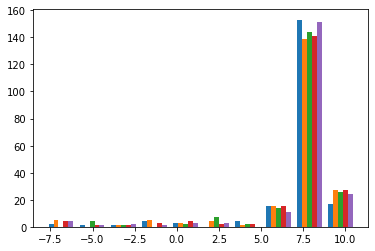

In [38]:
from pyod.utils.data import generate_data
import numpy as np
X_train, y_train, X_test, y_test = \
        generate_data(n_train=200,
                      n_test=100,
                      n_features=5,
                      contamination=0.1,
                      random_state=3)
plt.hist(X_train)

(array([[ 0.,  1.,  1.,  3., 42., 43., 46., 32., 30.,  2.],
        [ 1.,  1.,  1.,  7., 29., 49., 43., 30., 35.,  4.],
        [ 0.,  0.,  0.,  4., 35., 44., 33., 36., 43.,  5.],
        [ 0.,  1.,  1.,  5., 36., 40., 36., 47., 32.,  2.],
        [ 1.,  1.,  1.,  4., 25., 44., 46., 43., 31.,  4.]]),
 array([-7.53162607, -5.78128328, -4.0309405 , -2.28059771, -0.53025493,
         1.22008786,  2.97043064,  4.72077343,  6.47111622,  8.221459  ,
         9.97180179]),
 <a list of 5 BarContainer objects>)

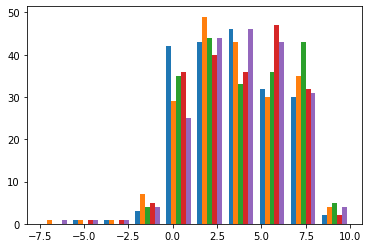

In [39]:
X_train = X_train * np.random.uniform(0, 1, size=X_train.shape)
X_test = X_test * np.random.uniform(0,1, size=X_test.shape)
plt.hist(X_train)

## pyOD 알고리즘
### ABOD

In [40]:
from pyod.models.abod import ABOD
clf_name = 'ABOD'
clf = ABOD()
clf.fit(X_train)
test_scores = clf.decision_function(X_test)

from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score
roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
prn = round(precision_n_scores(y_test, test_scores), ndigits=4)
print(f'{clf_name} ROC:{roc}, precision @ rank n:{prn}')

ABOD(contamination=0.1, method='fast', n_neighbors=5)

ABOD ROC:0.9056, precision @ rank n:0.8


### COPOD

In [41]:
from pyod.models.copod import COPOD
clf_name = 'COPOD'
clf = COPOD()
clf.fit(X_train)
test_scores = clf.decision_function(X_test)

from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score
roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
prn = round(precision_n_scores(y_test, test_scores), ndigits=4)
print(f'{clf_name} ROC:{roc}, precision @ rank n:{prn}')

COPOD(contamination=0.1)

COPOD ROC:0.9811, precision @ rank n:0.9


- https://towardsdatascience.com/fast-accurate-anomaly-detection-based-on-copulas-copod-3133ce9041fa

### Wow 1. COPOD does not require training data!
- fit가 필요없음

In [49]:
import seaborn as sns
X = np.concatenate([X_train, X_test], axis=0)
ys = np.concatenate([y_train, y_test])
X
ys

array([[ 5.73112926,  3.52410006,  7.26158777,  5.06381197,  4.7874467 ],
       [ 3.47685037,  5.96869718,  1.08080411,  5.73722932,  3.89000427],
       [ 5.99514197,  5.72629093,  4.86414753,  1.58708253,  3.18982562],
       ...,
       [ 0.2571778 , -0.90140521,  0.39854491, -0.52261059,  1.37556922],
       [ 4.04160949, -0.04905988, -2.97545906, -0.52472453,  0.05815534],
       [-1.14044278,  3.16918462,  0.13174924, -4.59312406,  2.62734965]])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

<AxesSubplot:ylabel='Density'>

Text(0.5, 1.0, 'Distribution of True data')

Text(0.5, 0, 'Outlier score')

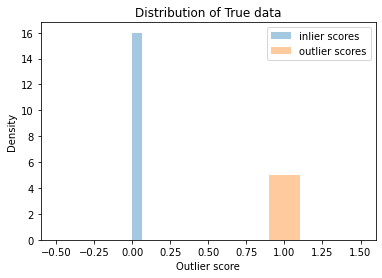

In [52]:
sns.distplot(ys[ys==0], label="inlier scores")
sns.distplot(ys[ys==1], label="outlier scores").set_title("Distribution of True data")
plt.legend()
plt.xlabel("Outlier score")

array([5.08145292, 4.05203262, 4.84754925, 5.4761909 , 5.76842388])

<AxesSubplot:ylabel='Density'>

Text(0.5, 1.0, 'Distribution of Outlier Scores from Unfitted COPOD Detector')

Text(0.5, 0, 'Outlier score')

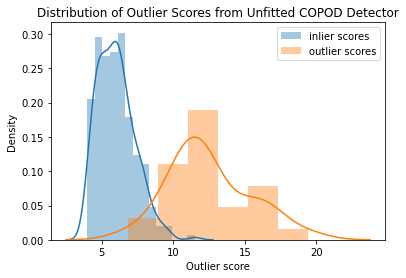

In [54]:
detector = COPOD()
scores = detector.decision_function(X)
scores[0:5]
sns.distplot(scores[ys==0], label="inlier scores")
sns.distplot(scores[ys==1], label="outlier scores").set_title("Distribution of Outlier Scores from Unfitted COPOD Detector")
plt.legend()
plt.xlabel("Outlier score")

As you see in the example above, I initialized the COPOD algorithm and simply passed data through the decision_function without fitting. The outlier scores of outlier points were generally much greater than those for inliers, or normal data points.
In application, it is usually useful to select thresholds for COPOD anomaly scores in order to identify which data to investigate as anomalies.

### Wow 2. Cool Feature: Anomaly Explanation
- COPOD can explain which feature(s) contributed most to the outlier score. This is especially helpful when there are many features in your dataset or you want to tell a human reviewer why the algorithm selected a particular row as an outlier.

In [56]:
clf = COPOD()
clf.fit(X_train)
train_outliers_idx = np.where(y_train==1)[0]
train_outliers_idx

COPOD(contamination=0.1)

array([180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199], dtype=int64)

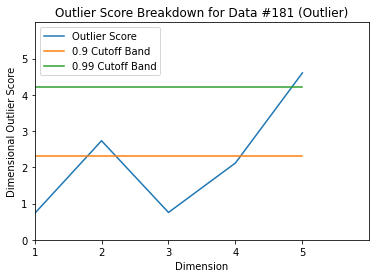

(0    0.724191
 1    2.733368
 2    0.754796
 3    2.120264
 4    4.605170
 Name: 180, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

In [57]:
clf.explain_outlier(180, cutoffs=None, feature_names=None)

The two Dimensional Outlier Graphs above plot the feature-level outlier scores for two true outliers (rows) detected as outliers by COPOD with the blue line. The x-axis indicates the feature and the y-axis indicates the outlier score for that feature alone. The 90th and 99th percentile outlier scores are also plotted.
In the left plot (row #182), the outlier score for dimension 3 exceeds the 99th percentile, meaning it is the main reason the row is an outlier.
In the right plot (row #193), the outlier scores for dimensions 1 and 2 both exceed the 99th percentile and are both reasons the row is an outlier.

COPOD(contamination=0.1)

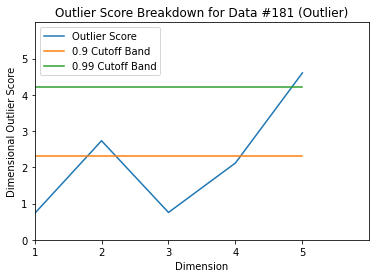

(0    0.724191
 1    2.733368
 2    0.754796
 3    2.120264
 4    4.605170
 Name: 180, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

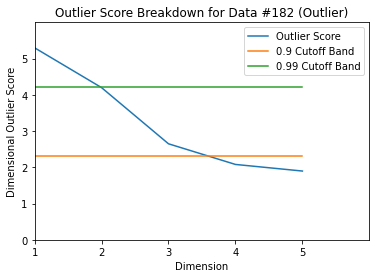

(0    5.298317
 1    4.199705
 2    2.649159
 3    2.079442
 4    1.897120
 Name: 181, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

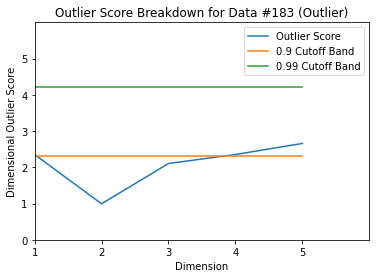

(0    2.353878
 1    0.994252
 2    2.104878
 3    2.353878
 4    2.659260
 Name: 182, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

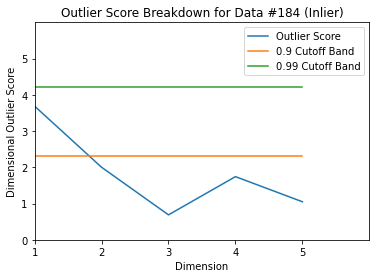

(0    3.688879
 1    2.002481
 2    0.688271
 3    1.742969
 4    1.049822
 Name: 183, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

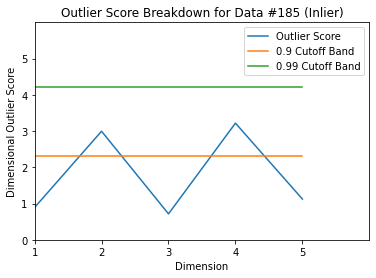

(0    0.891598
 1    2.995732
 2    0.716274
 3    3.218876
 4    1.123930
 Name: 184, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

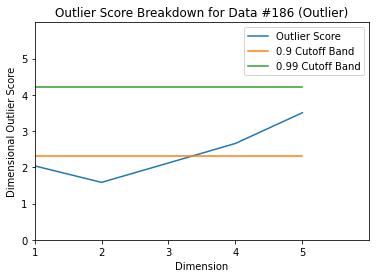

(0    2.040221
 1    1.584745
 2    2.120264
 3    2.659260
 4    3.506558
 Name: 185, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

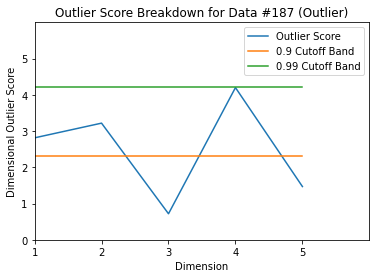

(0    2.813411
 1    3.218876
 2    0.718794
 3    4.199705
 4    1.469676
 Name: 186, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

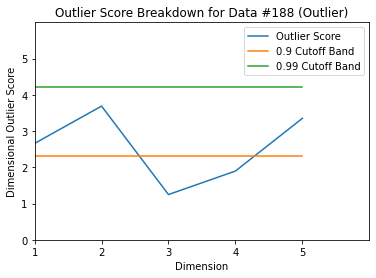

(0    2.659260
 1    3.688879
 2    1.248388
 3    1.897120
 4    3.352407
 Name: 187, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

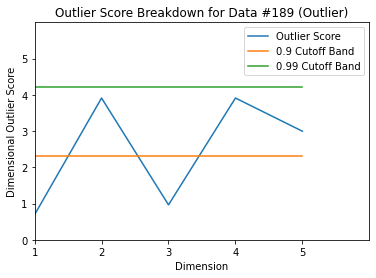

(0    0.693147
 1    3.912023
 2    0.964649
 3    3.912023
 4    2.995732
 Name: 188, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

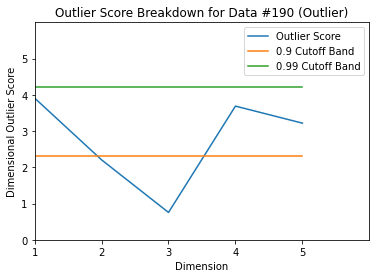

(0    3.912023
 1    2.207275
 2    0.755023
 3    3.688879
 4    3.218876
 Name: 189, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

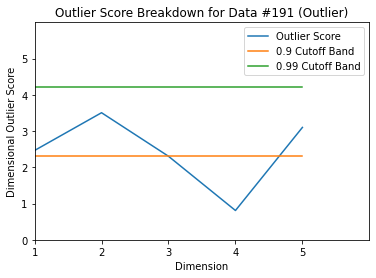

(0    2.465104
 1    3.506558
 2    2.305091
 3    0.808609
 4    3.101093
 Name: 190, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

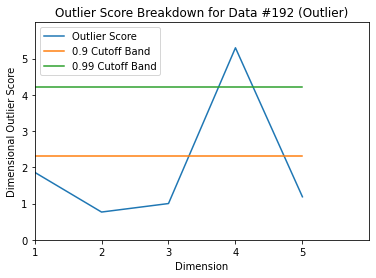

(0    1.864330
 1    0.765718
 2    1.000500
 3    5.298317
 4    1.187444
 Name: 191, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

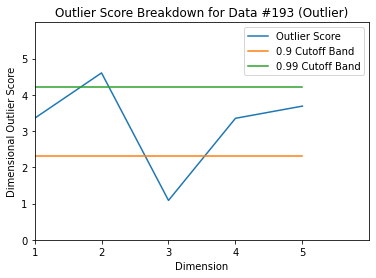

(0    3.352407
 1    4.605170
 2    1.086876
 3    3.352407
 4    3.688879
 Name: 192, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

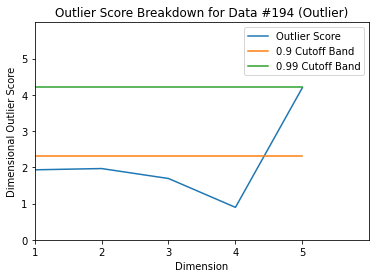

(0    1.931022
 1    1.966113
 2    1.691433
 3    0.895030
 4    4.199705
 Name: 193, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

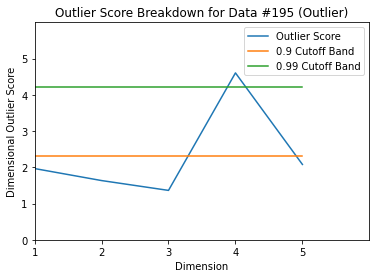

(0    1.966113
 1    1.634756
 2    1.363234
 3    4.605170
 4    2.079442
 Name: 194, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

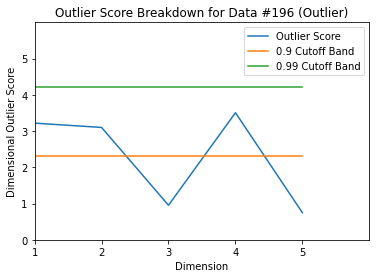

(0    3.218876
 1    3.101093
 2    0.953585
 3    3.506558
 4    0.747051
 Name: 195, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

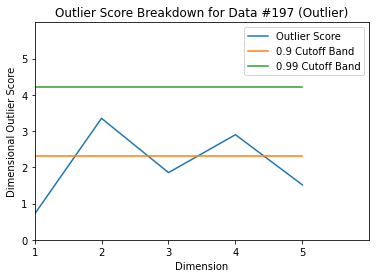

(0    0.709409
 1    3.352407
 2    1.854541
 3    2.900422
 4    1.514128
 Name: 196, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

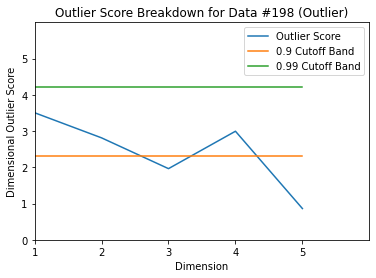

(0    3.506558
 1    2.813411
 2    1.963568
 3    2.995732
 4    0.862284
 Name: 197, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

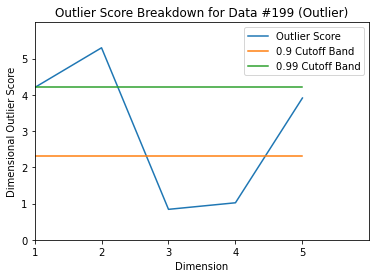

(0    4.199705
 1    5.298317
 2    0.840467
 3    1.021651
 4    3.912023
 Name: 198, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

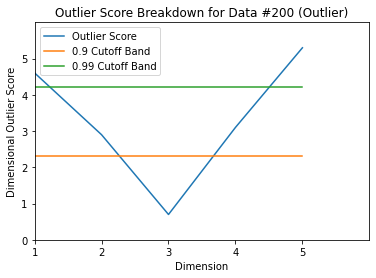

(0    4.605170
 1    2.900422
 2    0.698678
 3    3.101093
 4    5.298317
 Name: 199, dtype: float64,
 0    2.30997
 1    2.30997
 2    2.30997
 3    2.30997
 4    2.30997
 Name: 0.9, dtype: float64,
 0    4.20376
 1    4.20376
 2    4.20376
 3    4.20376
 4    4.20376
 Name: 0.99, dtype: float64)

In [55]:
for idx in train_outliers_idx:
  clf.explain_outlier(idx, cutoffs=None, feature_names=None)

## Types of Outlier Detection Algorithms

- refer to https://pyod.readthedocs.io/en/latest/benchmark.html

### Linear Models
- Linear models for outlier detection use linear models like PCA and one-class support vector machines to separate normal and outlier observations.
### Proximity-based
- Proximity-based models for outlier detection, such as K-Nearest Neighbors and Local Outlier Factor, use distances between data points to measure similarity. Observations that have high proximity to each other are more likely to be normal. Observations that are further away are more likely to be outliers
### Probabilistic
- Probabilistic models for outlier detection rely on statistical distributions to uncover outliers. Probabilistic detectors include Median Absolute Deviation (MAD), Copula-based Outlier Detection (COPOD), and Angle-based Outlier Detection (ABOD).
### Outlier Ensembles
- Outlier ensembles rely on model ensembles to isolate outlying points. Algorithms include Isolation Forest (also available in scikit-learn) and LODA (Lightweight On-line Detector of Anomalies).
### Neural Networks
- Neural networks can also be trained to identify anomalies.
- Autoencoder (and variational autoencoder) network architectures can be trained to identify anomalies without labeled instances. Autoencoders learn to compress and reconstruct the information in data. Reconstruction errors are then used as anomaly scores.
- More recently, several GAN architectures have been proposed for anomaly detection (e.g. MO_GAAL).

## <font color='purple'> Custom Detector Ensembles
One way to build a more robust outlier detection model (and avoid selecting a single model) is to combine models into a custom ensemble. This can be done by combining the anomaly scores of multiple anomaly detectors and scoring data using the aggregated score.
    
- refer to https://pyod.readthedocs.io/en/latest/example.html#model-combination-example
    
### Four score combination mechanisms are shown in this demo:

- Average: average scores of all detectors.
- maximization: maximum score across all detectors.
- Average of Maximum (AOM): divide base detectors into subgroups and take the maximum score for each subgroup. The final score is the average of all subgroup scores.
- Maximum of Average (MOA): divide base detectors into subgroups and take the average score for each subgroup. The final score is the maximum of all subgroup scores.

### 1. Import models and generate sample data.

In [31]:
from pyod.models.knn import KNN  # kNN detector

In [30]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.data import generate_data

X, y= generate_data(train_only=True)  # load data

ModuleNotFoundError: No module named 'combo'

In [35]:
# initialize 20 base detectors for combination
n_clf = 20

k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140,
            150, 160, 170, 180, 190, 200]

train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])

for i in range(n_clf):
    k = k_list[i]

    clf = KNN(n_neighbors=k, method='largest')
    clf.fit(X_train)

    train_scores[:, i] = clf.decision_scores_
    test_scores[:, i] = clf.decision_function(X_test)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=10, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=20, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=30, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=40, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=50, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=60, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=70, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=80, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=90, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=100, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=110, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=120, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=130, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=140, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=150, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=160, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=170, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=180, p=2,
  radius=1.0)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=190, p=2,
  radius=1.0)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 200, n_neighbors = 201

# End